In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/home/shekar/anaconda/Fruit_Vegetable_Recognition/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/validation/tomato/Image_4.jpg
/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/validation/tomato/Image_3.jpg
/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/validation/tomato/Image_1.jpg
/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/validation/tomato/Image_8.jpg
/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/validation/tomato/Image_10.jpg
/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/validation/tomato/Image_7.jpg
/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/validation/tomato/Image_9.jpg
/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/validation/tomato/Image_2.jpg
/home/s

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)


2.13.0


In [4]:
# Create a list with the filepaths for training and testing
train_dir = Path('/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [5]:
test_dir = Path('/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [6]:
val_dir = Path('/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognitio/home/shekarn/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [7]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [8]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [9]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2780

Number of different labels: 36

Labels: ['pineapple' 'carrot' 'peas' 'cauliflower' 'potato' 'lettuce' 'beetroot'
 'eggplant' 'garlic' 'cucumber' 'capsicum' 'paprika' 'banana'
 'pomegranate' 'grapes' 'ginger' 'corn' 'watermelon' 'kiwi' 'mango'
 'sweetcorn' 'tomato' 'turnip' 'chilli pepper' 'raddish' 'spinach'
 'bell pepper' 'onion' 'cabbage' 'pear' 'orange' 'jalepeno' 'sweetpotato'
 'soy beans' 'apple' 'lemon']


In [10]:
train_df.head(36)

,Filepath,Label
0,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,pineapple
1,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,carrot
2,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,peas
3,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,cauliflower
4,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,potato
5,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,lettuce
6,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,beetroot
7,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,lettuce
8,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,eggplant
9,/home/shekar/anaconda/Fruit_Vegetable_Recognit...,peas


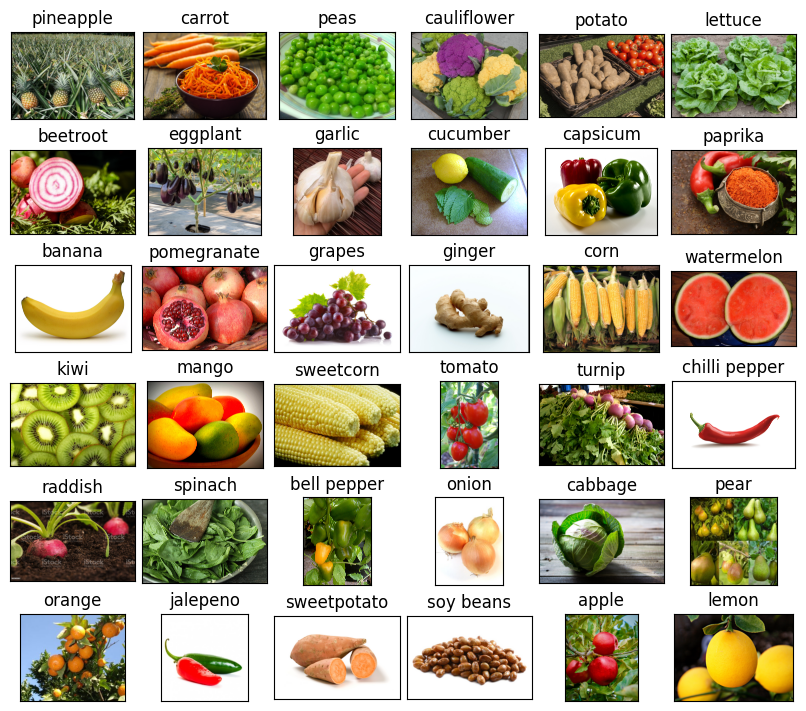

In [13]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [14]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [15]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2780 validated image filenames belonging to 36 classes.


In [16]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 334 validated image filenames belonging to 36 classes.


In [21]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)
              

Found 334 validated image filenames belonging to 36 classes.


In [23]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [24]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
87/87 [==============================] - 46s 514ms/step - loss: 1.7722 - accuracy: 0.5353 - val_loss: 0.5225 - val_accuracy: 0.8443
Epoch 2/5
87/87 [==============================] - 44s 507ms/step - loss: 0.5624 - accuracy: 0.8205 - val_loss: 0.3445 - val_accuracy: 0.8922
Epoch 3/5
87/87 [==============================] - 44s 511ms/step - loss: 0.3354 - accuracy: 0.8896 - val_loss: 0.2802 - val_accuracy: 0.9311
Epoch 4/5
87/87 [==============================] - 46s 528ms/step - loss: 0.2382 - accuracy: 0.9270 - val_loss: 0.2180 - val_accuracy: 0.9371
Epoch 5/5
87/87 [==============================] - 45s 522ms/step - loss: 0.1433 - accuracy: 0.9572 - val_loss: 0.1864 - val_accuracy: 0.9431


In [25]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 6s 534ms/step


['banana',
 'paprika',
 'cucumber',
 'cauliflower',
 'beetroot',
 'mango',
 'potato',
 'cabbage',
 'lettuce',
 'lemon',
 'mango',
 'lemon',
 'grapes',
 'pomegranate',
 'grapes',
 'eggplant',
 'pomegranate',
 'paprika',
 'potato',
 'pineapple',
 'paprika',
 'cauliflower',
 'mango',
 'lettuce',
 'lettuce',
 'pear',
 'banana',
 'orange',
 'watermelon',
 'pomegranate',
 'soy beans',
 'bell pepper',
 'tomato',
 'soy beans',
 'orange',
 'eggplant',
 'paprika',
 'spinach',
 'beetroot',
 'kiwi',
 'capsicum',
 'carrot',
 'tomato',
 'spinach',
 'cauliflower',
 'raddish',
 'lemon',
 'watermelon',
 'sweetcorn',
 'jalepeno',
 'sweetpotato',
 'garlic',
 'watermelon',
 'pear',
 'sweetpotato',
 'paprika',
 'paprika',
 'lettuce',
 'turnip',
 'sweetcorn',
 'cucumber',
 'cauliflower',
 'sweetpotato',
 'soy beans',
 'lemon',
 'turnip',
 'watermelon',
 'sweetcorn',
 'soy beans',
 'onion',
 'chilli pepper',
 'tomato',
 'ginger',
 'kiwi',
 'beetroot',
 'chilli pepper',
 'eggplant',
 'onion',
 'kiwi',
 'tomat

In [26]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [28]:
img = output('/home/shekar/anaconda/Fruit_Vegetable_Recognition/input/fruit-and-vegetable-image-recognition/test/apple/Image_1.jpg')
img

1/1 [==============================] - 0s 18ms/step


'apple'

In [ ]:
model.save('Shekar.h5')